In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        (os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 kB 11.7 MB/s eta 0:00:00a 0:00:01


In [3]:
from ultralytics import YOLO

model = YOLO('yolov8n-seg.pt')  # load a pretrained model (recommended for training)

model.train(data='/kaggle/input/bep-cables/data.yaml', epochs=200, imgsz=640)

100%|██████████| 6.73M/6.73M [00:00<00:00, 74.2MB/s]
Ultralytics YOLOv8.0.202 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/kaggle/input/bep-cables/data.yaml, epochs=200, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_m

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
100%|██████████| 6.23M/6.23M [00:00<00:00, 70.7MB/s]
AMP: checks passed ✅
train: Scanning /kaggle/input/bep-cables/train/labels... 243 images, 0 backgrounds, 0 corrupt: 100%|██████████| 243/243 [00:00<00:00, 362.36it/s]
train: WARNING ⚠️ Cache directory /kaggle/input/bep-cables/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Scanning /kaggle/input/bep-cables/valid/labels... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<00:00, 355.33it/s]
val: WARNING ⚠️ Cache directory /kaggle/input/bep-cables/valid is not writeable, cache not saved.
Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' 

lr/pg0,▁▄███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▁▄███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▁▄███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▂▄▆▄▆▅▄▅▅▆▆▆▆▆▇▆▇▆▇▇▇▇▇▇▇██▇▇▇▇▇▇▇▇▇▇▇█
metrics/mAP50(M),▁▂▄▅▄▆▆▄▅▇▇▆▇▇▆▇▆█▆█▇▇▇▇▇▇██▇▇▇█▇██▇▇█▇█
metrics/mAP50-95(B),▁▂▄▅▄▅▅▄▅▅▆▆▆▆▆▇▆▇▆▇▇█▇▇▇▇███▇▇▇▆▇▇▇▇█▆█
metrics/mAP50-95(M),▁▂▄▄▄▆▅▄▄▆▆▆▆▆▆▇▆▇▆▇▇▆▇▇▇▇▇██▇▇▇▇███▇█▇█
metrics/precision(B),▁▄▅▇▆▇▆▅▅▇▇▆▆▆▆▇▆▇▆▇▇▇▇▇▇▇█▇▇▇▇▇██▆█▇███
metrics/precision(M),▁▅▆▆▅▇▆▅▆█▇▆▆▇▇▆▇▇▆▇▇▇▇▆█▇▇▇▇▇▇▇▆▇▇▇█▇▇█
metrics/recall(B),█▁▃▄▃▅▅▄▄▄▅▅▆▆▅▆▆▆▅▆▆▆▅▆▆▅▆▇▆▆▆▆▅▆▆▆▅▅▅▆
metrics/recall(M),█▁▃▄▃▅▆▄▄▅▆▅▇▆▅▇▇▇▆▇▇▆▅▆▆▇▇▇▇▇▇▇█▇▇▆▆▇▆▇


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a7fe036ac20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

In [27]:
import plotly.express as px
import pandas as pd

df = pd.read_csv("/kaggle/working/runs/segment/train/results.csv")
fig = px.line(df, x='                  epoch', y='       metrics/mAP50(B)', title='mAP50')
fig.show()

In [30]:
model = YOLO('/kaggle/working/runs/segment/train/weights/best.pt')

In [31]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2



0: 640x640 2 cabels, 16.4ms
Speed: 2.0ms preprocess, 16.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


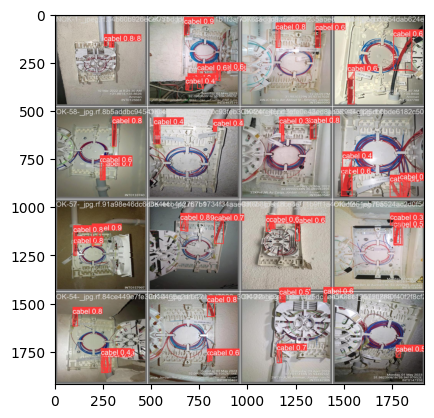

In [33]:
img=plt.imread('/kaggle/working/runs/segment/train/val_batch0_pred.jpg')
plt.imshow(img)

In [34]:
image = Image.open('/kaggle/input/bep-cables/test/images/NOK-18-_jpg.rf.732995bf76291bdc1e6220a1cbba516b.jpg') 
results = model(image)


0: 640x640 2 cabels, 16.8ms
Speed: 3.4ms preprocess, 16.8ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)


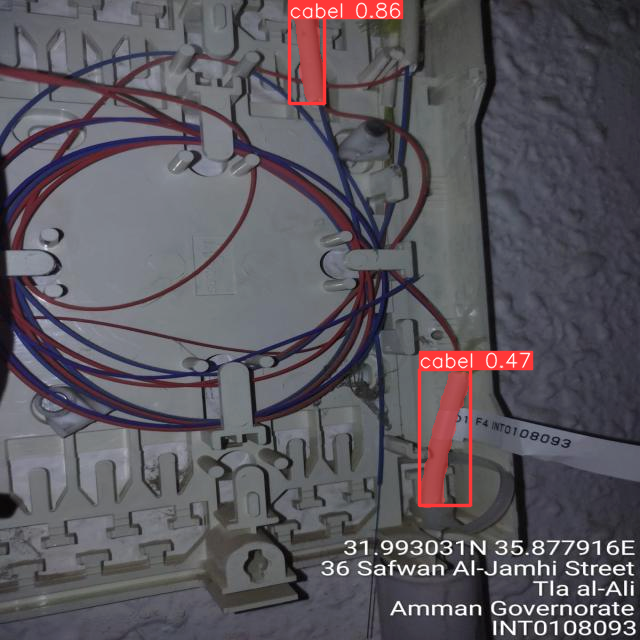

In [38]:
plot = results[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [61]:
def predict_plot_results(image):
    results=model(image)
    result = results[0]
    
    box = result.boxes[0]
    for result in results:
        boxes = result.boxes  # Boxes object for bbox outputs
        masks = result.masks  # Masks object for segmentation masks outputs
        probs = result.probs
        
    
    for box in result.boxes:
        
        print("---")
        class_id = result.names[box.cls[0].item()]
        cords = box.xyxy[0].tolist()
        cords = [round(x) for x in cords]
        conf = round(box.conf[0].item(), 2)
        print("Object type:", class_id)
        print("Coordinates:", cords)
        print("Probability:", conf)
        print("---")
        
  
    plot = results[0].plot()
    plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(plot))


image 1/1 /kaggle/input/bep-cables/test/images/NOK-8-_jpeg.rf.df9ead5fe9157c8821e4e6292bda4169.jpg: 640x640 5 cabels, 16.5ms
Speed: 1.8ms preprocess, 16.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


---
Object type: cabel
Coordinates: [253, 182, 298, 277]
Probability: 0.78
---
---
Object type: cabel
Coordinates: [235, 181, 273, 300]
Probability: 0.69
---
---
Object type: cabel
Coordinates: [416, 176, 460, 274]
Probability: 0.68
---
---
Object type: cabel
Coordinates: [242, 187, 271, 296]
Probability: 0.37
---
---
Object type: cabel
Coordinates: [429, 178, 461, 272]
Probability: 0.31
---


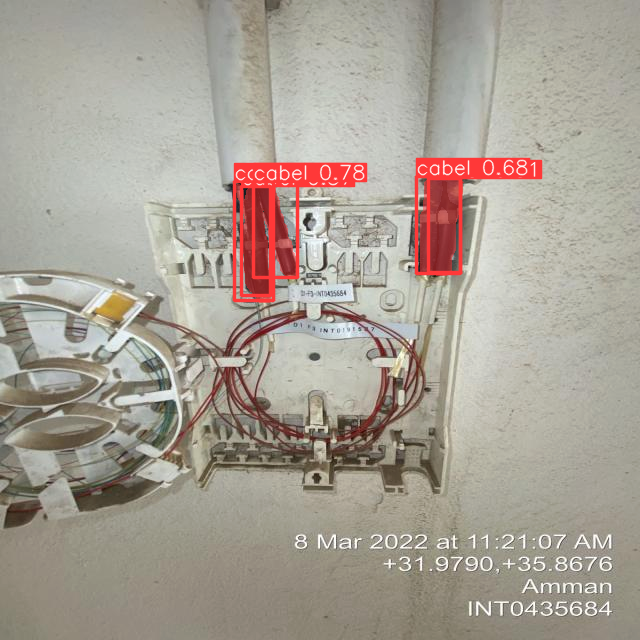

In [63]:
predict_plot_results('/kaggle/input/bep-cables/test/images/NOK-8-_jpeg.rf.df9ead5fe9157c8821e4e6292bda4169.jpg')


image 1/1 /kaggle/input/bep-cables/test/images/OK-49-_jpg.rf.8ab01e0c36998380375cc3e9f2145ebe.jpg: 640x640 3 cabels, 17.0ms
Speed: 1.7ms preprocess, 17.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


---
Object type: cabel
Coordinates: [256, 88, 297, 191]
Probability: 0.81
---
---
Object type: cabel
Coordinates: [356, 102, 379, 185]
Probability: 0.81
---
---
Object type: cabel
Coordinates: [255, 83, 289, 262]
Probability: 0.25
---


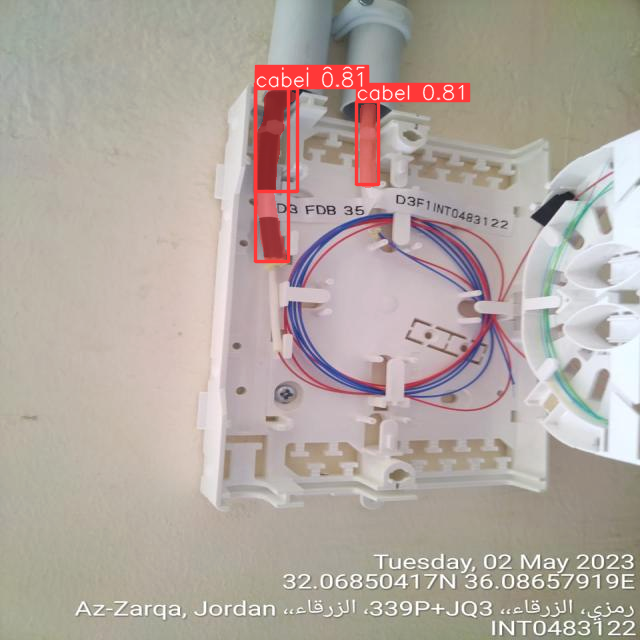

In [64]:
predict_plot_results('/kaggle/input/bep-cables/test/images/OK-49-_jpg.rf.8ab01e0c36998380375cc3e9f2145ebe.jpg')


image 1/1 /kaggle/input/bep-cables/test/images/NOK-42-_jpg.rf.6e369d9f81786eaab2f4ddcfd4b14d90.jpg: 640x640 5 cabels, 16.7ms
Speed: 1.7ms preprocess, 16.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


---
Object type: cabel
Coordinates: [252, 243, 272, 292]
Probability: 0.71
---
---
Object type: cabel
Coordinates: [271, 190, 280, 221]
Probability: 0.55
---
---
Object type: cabel
Coordinates: [257, 191, 288, 292]
Probability: 0.49
---
---
Object type: cabel
Coordinates: [335, 196, 348, 221]
Probability: 0.32
---
---
Object type: cabel
Coordinates: [277, 189, 288, 227]
Probability: 0.28
---


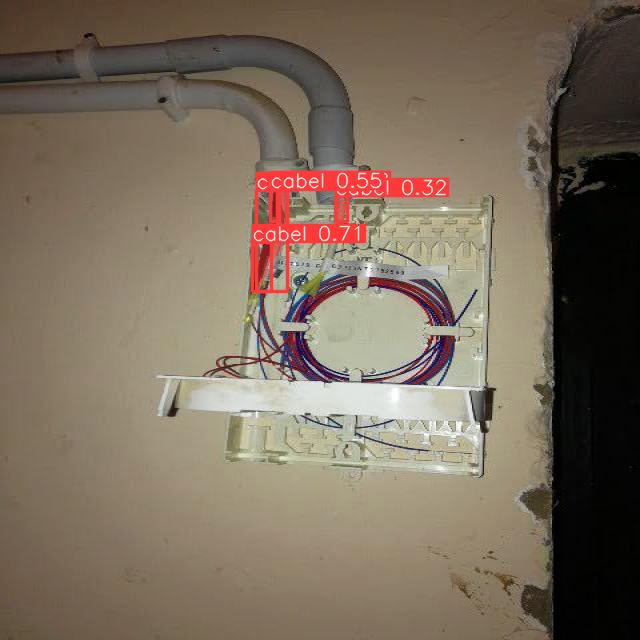

In [66]:
predict_plot_results('/kaggle/input/bep-cables/test/images/NOK-42-_jpg.rf.6e369d9f81786eaab2f4ddcfd4b14d90.jpg')

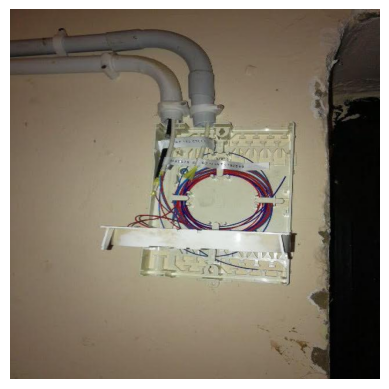

In [71]:
import matplotlib.image as mpimg

image_path = '/kaggle/input/bep-cables/test/images/NOK-42-_jpg.rf.6e369d9f81786eaab2f4ddcfd4b14d90.jpg'
image = mpimg.imread(image_path)

plt.imshow(image)
plt.axis('off') 
plt.show()